Posibles preguntas para análisis EDA:

Del dataset de Movimientos:
1. Ver cuál es el artículo que más se vende, a partir del Id del producto (relación entre id_producto y venta_unidades)

 Carme: Hecho en mi EDA, para toda la serie temporal, quizas evoluciona segun el año (se podria mirar)

2. También se podría hacer una comparación de las venta_unidades con el precio de venta (precio_unitario), para ver si el precio afecta a la cantidad de los productos que se venden, es decir, si es más económico se vende más el producto o no?

 Carme: yo creo que este punto se va del enunciado. Si que seria necesario evaluar outliers en cuanto a precio.

3. Se podría ver de acuerdo a la fecha la cantidad de ventas, es decir, en qué fechas se vendió más. Según estimo, en invierno se debería vender más. En Argentina las estaciones son las siguientes: 
Verano (21 de diciembre a 20 de marzo).
Otoño (21 de marzo a 20 de junio).
Invierno (21 de junio a 20 de septiembre). Supongo que en estas fechas se debe vender más ya que las casas están más cerradas.
Primavera (21 de septiembre a 20 de diciembre).
También, del 18 al 29 de julio suelen ser las vacaciones escolares de invierno en Argentina. Y bueno, también está semana Santa, que es igual en todos lados.

 Carme: ver mi EDA, he hecho un gráfico por producto aunque no sé acabar de cuadrar la escala para que se vea mejor (lo volveré a intentar), hay también muchos productos. Por otro lado se obserba como hay productos que se empiezan a vender mas tarde que otros y no hay historico de 2016, 2017, etc.
  La estacionalidad aun no la he podido ver.
  He mirado mirando tambien los dias que son laborables segun la tienda para cada año

4. Con el Identificador interno de Boca (idb) quizás se podría analizar que idb ha tenido más ventas, quizás me equivoco pero el idb sería el local que lo vende? Porque si es así, se estaría viendo que local tiene más ventas.

  Carme: Yo creo que esto se va de la pregunta, pero si quizás verlo para añadir como valor añadido a posteriori a predecir las ventas para cada idb. Pendiente hacer por mi

OTRAS PREGUNTAS CARME
- Ver cuantos días anuales hay ventas, hecho en EDA Carme
- Ver si hay picos extraños en las ventas, ventas 0. Hecho para ventas 0 en EDA Carme. Falta ver si hay picos/outliers quizás

Del dataset de Promociones:
Si ventas_estimadas_und son las ventas que se realizaron en la promoción se me ocurren algunas ideas:
1. Comparar que productos se vendieron más (relación id_producto y ventas_estimadas_und).
2. Ver si el porcentaje de descuento afecta a las ventas, es decir, si tienen más % de descuento se venden más? (relación porcentaje_dcto y ventas_estimadas_und)
3. Realizar una comparación entre las ventas y la duración de la promoción, es decir, si la promoción duró más se produjeron más ventas? Esto es un poco complicado porque imagino que de acuerdo al % de descuento puede variar.
4. De nuevo si el idb es el local, se podrían hacer 2 análisis, cuál local tuvo más promociones (relación idb y count(nro_prom)) y cuál local vendió más (realción idb y ventas_estimadas_und).


De los dataset locales y proveedor, se pueden ver muchas cosas, pero no sé que grado de importancia tiene cada una:
1. Relación id_cadena con id_producto, supongo que con esta relación se puede ver que productos vende más una cadena en particular.
2. Con respecto a latitud y longitud, se puede hacer un gráfico que relacione la ubicación con las ventas por ejemplo, para ver si hay alguna zona donde se produzcan más ventas que otras, pero si falta mucha información quizás no tiene sentido. (abajo copio un código que se puede usar adaptándolo)


No me queda claro, en la última tabla que hiciste merged.df que es  id_producto_x y  id_producto_y.

OTROS COMENTARIOS CARME: Yo no veo merged.df
- Cuando intento hacer graficos con la fecha en eje x no mea aparece bien. ver formato de fecha_trans con Erika, he buscado por internet y quizás hay que cambiarlo, ver mi EDA que he usado la libreria datetime para usarlo en graficos
-
-

### Dataset PROMOCIONES

In [51]:
# Importamos las librerías:
import matplotlib.pyplot as plt
plt.style.use('classic')
# Línea necesaria para que Matplotlib muestre por defecto los gráficos en nuestro Notebook:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime

In [176]:
movimientos="D:\Desodorantes\deodorants-project\clean_data\movimientos_clean.csv"
df = pd.read_csv(movimientos, sep=",", skiprows=0)
promociones="D:\Desodorantes\deodorants-project\clean_data\promociones_clean.csv"
df_promociones = pd.read_csv(promociones, sep=",", skiprows=0)
locales="D:\Desodorantes\deodorants-project\clean_data\locales_clean.csv"
df_locales = pd.read_csv(locales, sep=",", skiprows=0)
productos="D:\Desodorantes\deodorants-project\clean_data\prov_prod_clean.csv"
df_productos = pd.read_csv(productos, sep=",", skiprows=0)

In [57]:
df_promociones.head(20)

,idb,id_producto,fecha_desde,fecha_hasta,ventas_estimadas_und,nro_prom,fecha_trans,porcentaje_dcto,duracion_promo,year,month,weekday
0,242,228217,2016-10-23,2016-10-30,0.98,436830,2016-10-05,7.0,7.0,2016,10,2
1,242,228217,2016-10-23,2016-10-30,0.98,436830,2016-10-06,7.0,7.0,2016,10,3
2,242,228217,2016-10-23,2016-10-30,0.98,436830,2016-10-07,7.0,7.0,2016,10,4
3,242,228217,2016-10-23,2016-10-30,0.98,436830,2016-10-08,7.0,7.0,2016,10,5
4,242,228217,2016-10-23,2016-10-30,0.98,436830,2016-10-09,7.0,7.0,2016,10,6
5,242,228217,2016-10-23,2016-10-30,0.98,436830,2016-10-10,7.0,7.0,2016,10,0
6,242,228217,2016-10-23,2016-10-30,0.98,436830,2016-10-11,7.0,7.0,2016,10,1
7,242,228217,2016-10-23,2016-10-30,0.98,436830,2016-10-12,7.0,7.0,2016,10,2
8,242,228217,2016-10-23,2016-10-30,0.98,436830,2016-10-13,7.0,7.0,2016,10,3
9,242,228217,2016-10-23,2016-10-30,0.98,436830,2016-10-14,7.0,7.0,2016,10,4


In [32]:
df_promociones.describe()

,idb,id_producto,ventas_estimadas_und,nro_prom,porcentaje_dcto,duracion_promo,year,month,weekday
count,285253.000000,285253.000000,285253.000000,285253.000000,285253.000000,285253.000000,285253.000000,285253.000000,285253.000000
mean,7065.578963,388393.367197,24.622701,471275.031435,8.394103,8.394103,2017.204836,6.517632,3.081836
std,3169.254446,83906.420820,30.314661,37596.939924,2.893570,2.893570,1.093749,2.929292,1.981467
min,242.000000,164146.000000,0.000000,425196.000000,3.000000,3.000000,2016.000000,1.000000,0.000000
25%,5207.000000,342682.000000,6.000000,436830.000000,7.000000,7.000000,2016.000000,4.000000,1.000000
50%,9026.000000,427445.000000,12.520000,456807.000000,7.000000,7.000000,2017.000000,7.000000,3.000000
75%,9159.000000,458395.000000,30.440000,502702.000000,8.000000,8.000000,2018.000000,9.000000,5.000000
max,9977.000000,507528.000000,300.820000,541066.000000,18.000000,18.000000,2019.000000,12.000000,6.000000


### Matriz de correlaciones entre variables

C:\Users\ro424\AppData\Local\Temp\ipykernel_31708\1788949295.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_promociones.corr()# traza el mapa de calor


<Axes: >

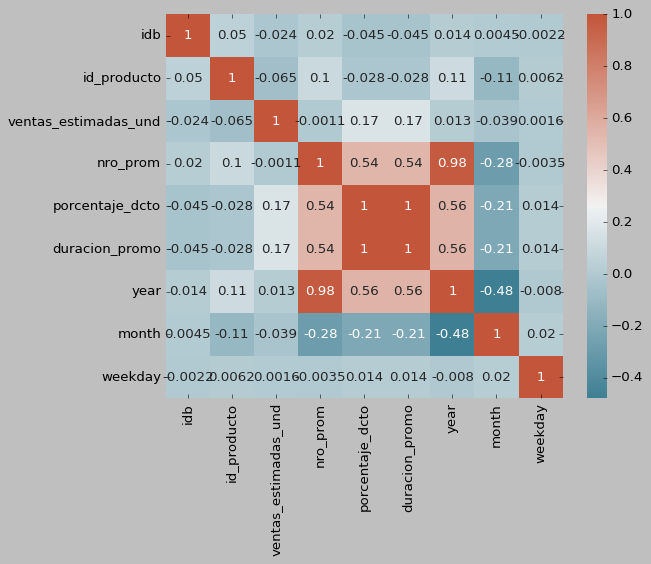

In [105]:
corr = df_promociones.corr()# traza el mapa de calor 
sns.heatmap(corr, xticklabels=corr.columns, 
            yticklabels=corr.columns, 
            annot=True, 
            cmap=sns.diverging_palette(220, 20, as_cmap=True ))

Se observa que entre porcentaje de descuento (porcentaje_dcto) y duración de la promoción (duracion_promo) hay una estrecha relación, esto puede deberse a que son los mismos datos por lo que creo que se debería descartar uno de los dos.

Se evidencia una clara relación lineal entre el año (year) y el número de la promoción (nro_prom), esto se debe que al aumentar el año, aumenta el número de la promoción.

En cuanto a la relación entre el año (year) y el porcentaje de descuento (porcentaje_dcto) o la duración de la promoción (duracion_promo), se observa una tendencia aunque no resulta demasiado evidente.


#### Relación entre el año y la cantidad de promociones

In [150]:
año_promociones=df_promociones.groupby(['year'],as_index=False)['nro_prom'].count()
año_promociones

,year,nro_prom
0,2016,95851
1,2017,86661
2,2018,51201
3,2019,51540


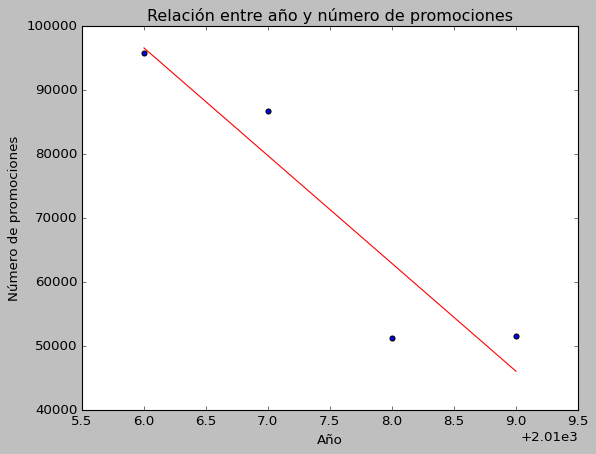

In [189]:
plt.scatter(año_promociones['year'], año_promociones['nro_prom'])
plt.xlabel('Año')
plt.ylabel('Número de promociones')
plt.title('Relación entre año y número de promociones')


# Ajustar una línea de tendencia
coef = np.polyfit(año_promociones['year'], año_promociones['nro_prom'], 1)
line = np.poly1d(coef)
plt.plot(df['year'], line(df['year']), color='red')



plt.show()

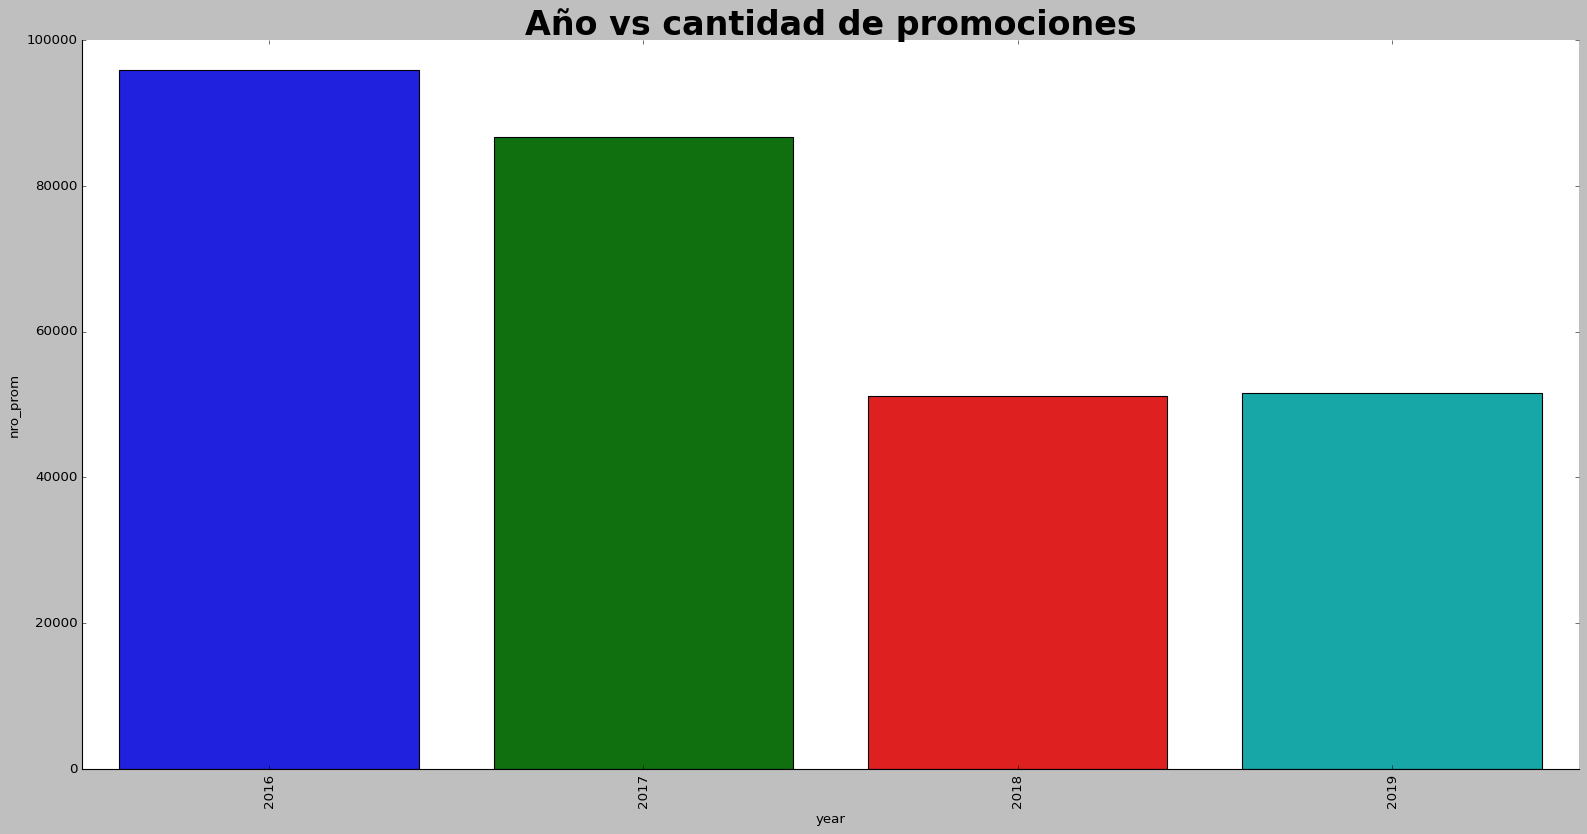

In [158]:
sns.catplot(x="year", y="nro_prom", data=año_promociones, kind= "bar" , height=10, aspect=2)
plt.title("Año vs cantidad de promociones", fontsize=30, fontweight='bold')
plt.xticks(rotation= 90)
plt.show()

Se puede apreciar que durante el periodo de 2016 a 2018, la cantidad de promociones ha ido disminuyendo. No obstante, en 2019 se evidencia un aumento en el número de promociones, siendo incluso mayor que en 2018, a pesar de que solo se tienen registros hasta el mes de julio de dicho año.

#### Relación entre el año y porcentaje de descuento 

In [178]:
año_descuento=df_promociones.groupby(['year'],as_index=False)['porcentaje_dcto'].mean()
año_descuento

,year,porcentaje_dcto
0,2016,6.975264
1,2017,7.573245
2,2018,9.289545
3,2019,11.523438


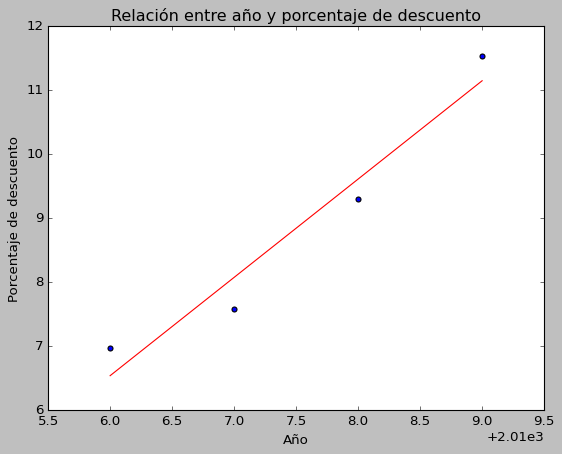

In [187]:
plt.scatter(año_descuento['year'], año_descuento['porcentaje_dcto'])
plt.xlabel('Año')
plt.ylabel('Porcentaje de descuento')
plt.title('Relación entre año y porcentaje de descuento')


# Ajustar una línea de tendencia
coef = np.polyfit(año_descuento['year'], año_descuento['porcentaje_dcto'], 1)
line = np.poly1d(coef)
plt.plot(df['year'], line(df['year']), color='red')



plt.show()

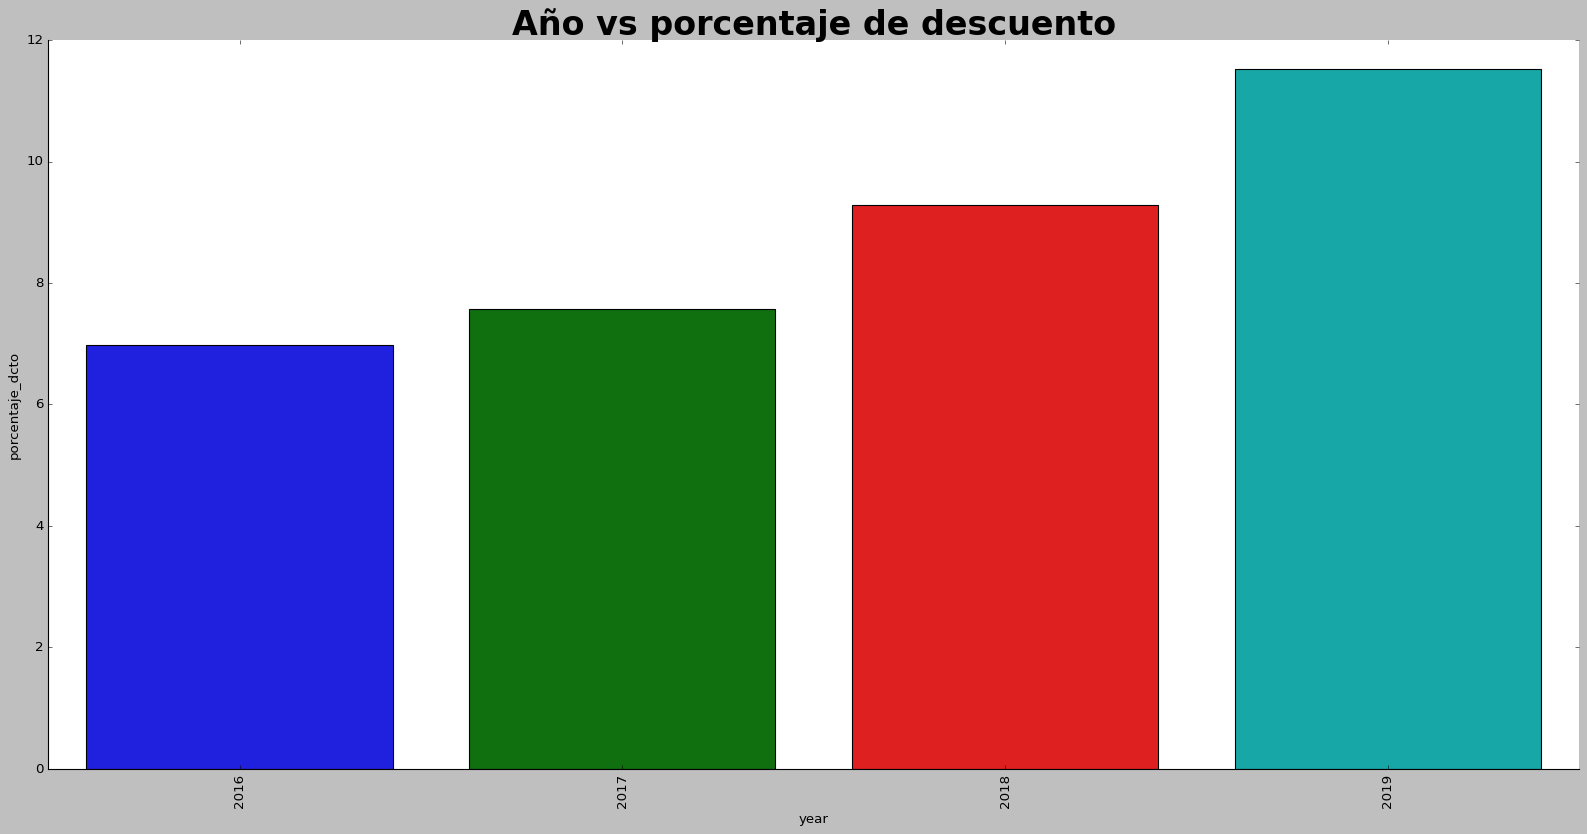

In [190]:
sns.catplot(x="year", y="porcentaje_dcto", data=año_descuento, kind= "bar" , height=10, aspect=2)
plt.title("Año vs porcentaje de descuento", fontsize=30, fontweight='bold')
plt.xticks(rotation= 90)
plt.show()

Se puede observar que el porcentaje de descuento ha aumentado progresivamente a lo largo de los años.

#### Comparar que productos se vendieron más (relación id_producto y ventas_estimadas_und).

In [113]:
mas_vendidos=df_promociones.groupby(['id_producto'],as_index=False)['ventas_estimadas_und'].sum()
mas_vendidos = mas_vendidos.sort_values(by='ventas_estimadas_und', ascending=False)
mas_vendidos

,id_producto,ventas_estimadas_und
45,429883,279440.09
23,342686,274723.91
26,342745,262480.87
22,342682,254564.43
46,447299,250943.24
...,...,...
34,386296,1967.66
40,421885,1629.64
7,238243,1597.62
6,238242,1453.76


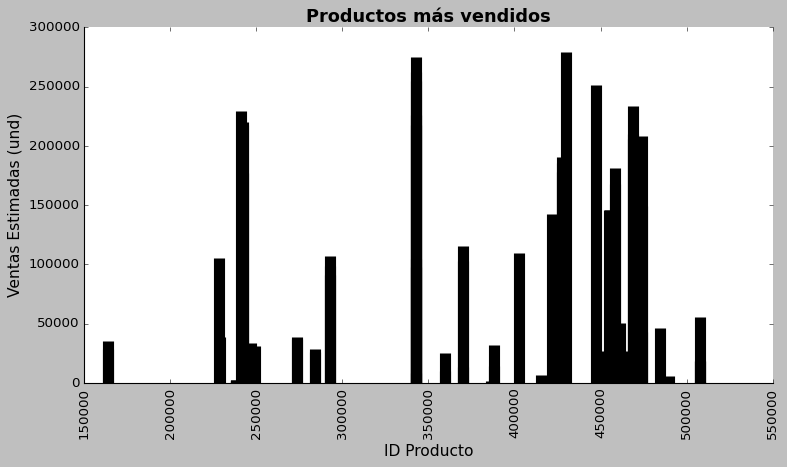

In [127]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(mas_vendidos['id_producto'], mas_vendidos['ventas_estimadas_und'], color='#008000', linewidth=10)
ax.set_xlabel('ID Producto', fontsize=14)
ax.set_ylabel('Ventas Estimadas (und)', fontsize=14)
ax.set_title('Productos más vendidos', fontsize=16, fontweight='bold')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

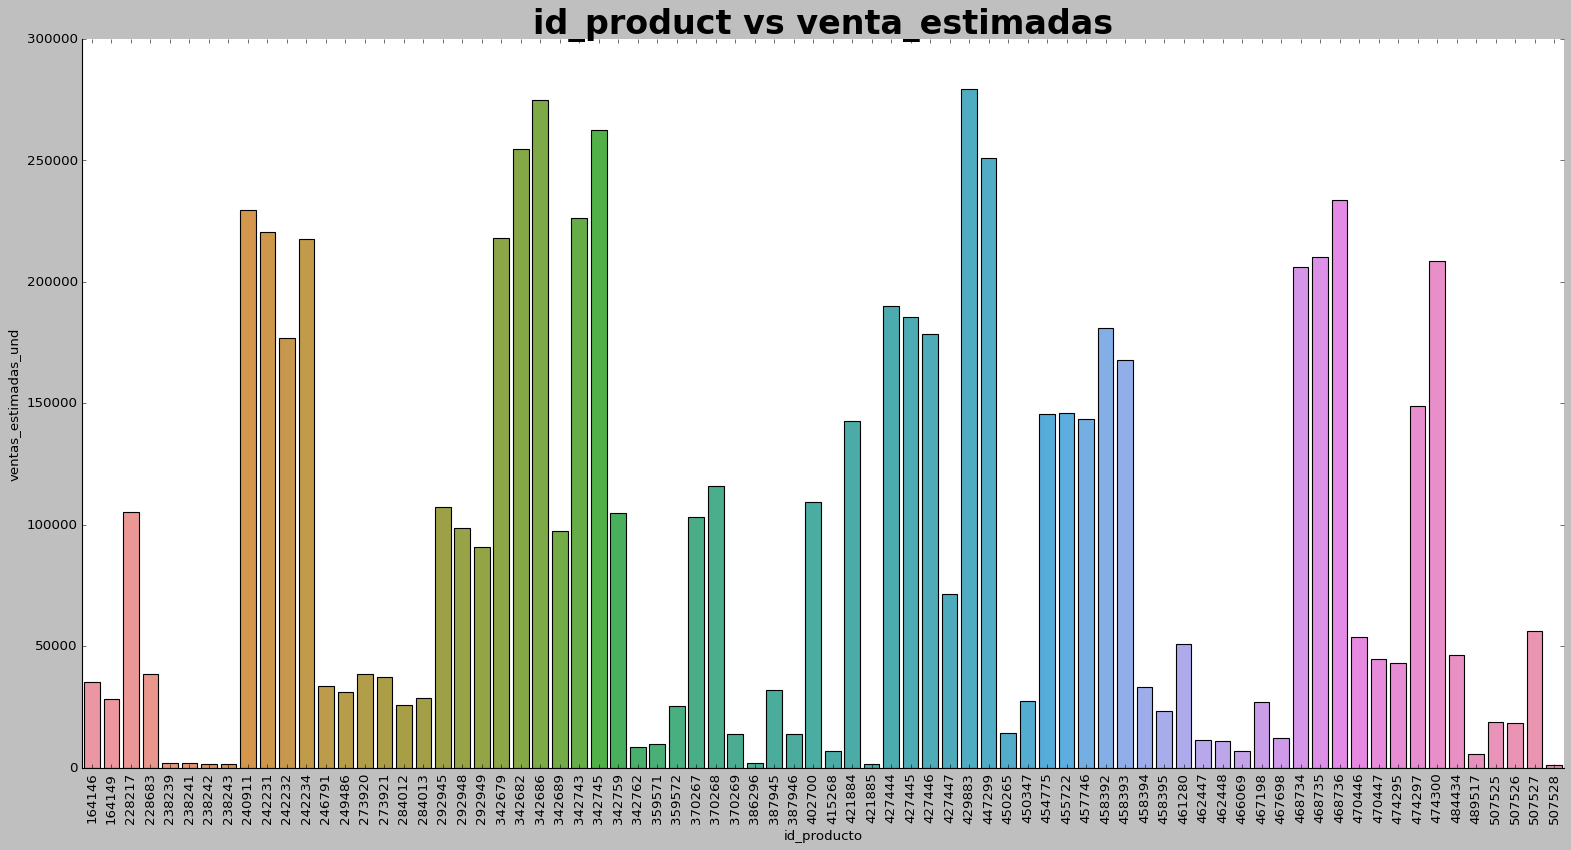

In [160]:
df_promociones=df_promociones.groupby(['id_producto'],as_index=False)['ventas_estimadas_und'].sum()
sns.catplot(x="id_producto", y="ventas_estimadas_und", data=df_promociones, kind= "bar" , height=10, aspect=2)
plt.title("id_product vs venta_estimadas", fontsize=30, fontweight='bold')
plt.xticks(rotation= 90)
plt.show()

Se obserban los productos más vendidos, si hacemos el corte en 200k unidades serian los siguientes:

Ver si los de las ventas estimadas son los mismos que los de Carme, quizás hacerlo con los datos merge así se pueden comparar.

In [27]:
df_promociones=df_promociones.query("ventas_estimadas_und >= 200000")
print(df_promociones)

    id_producto  ventas_estimadas_und
8        240911             229671.75
9        242231             220395.63
11       242234             217587.01
21       342679             218024.93
22       342682             254564.43
23       342686             274723.91
25       342743             226062.58
26       342745             262480.87
45       429883             279440.09
46       447299             250943.24
62       468734             205864.06
63       468735             210034.15
64       468736             233660.33
69       474300             208547.49


#### Ver si el porcentaje de descuento afecta a las ventas, es decir, si tienen más % de descuento se venden más? (porcentaje_dcto y ventas_estimadas_und)

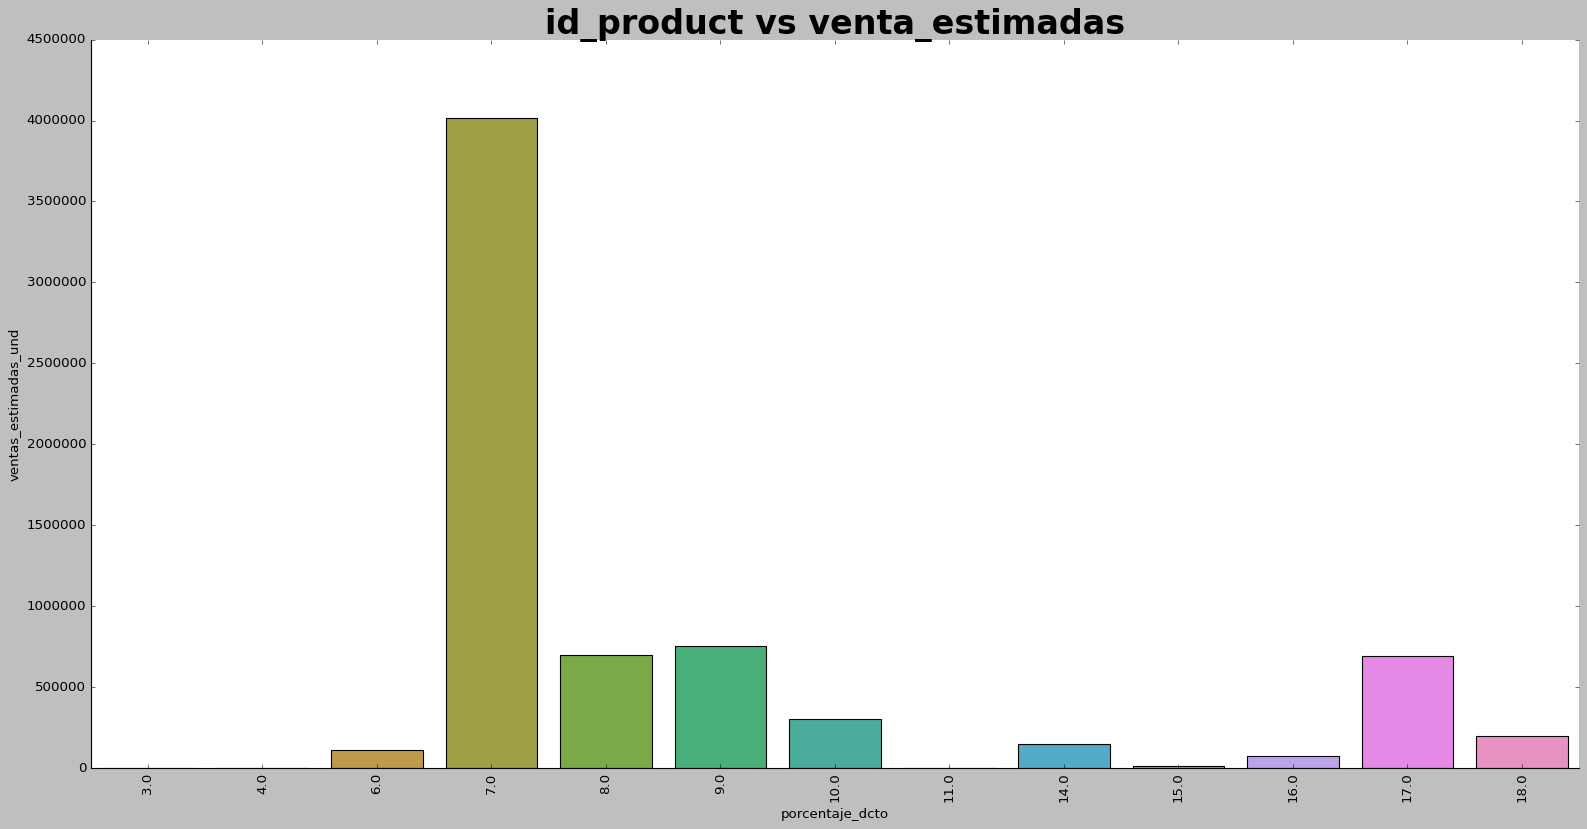

In [163]:
df_promociones=df_promociones.groupby(['porcentaje_dcto'],as_index=False)['ventas_estimadas_und'].sum()
sns.catplot(x="porcentaje_dcto", y="ventas_estimadas_und", data=df_promociones, kind= "bar" , height=10, aspect=2)
plt.title("id_product vs venta_estimadas", fontsize=30, fontweight='bold')
plt.xticks(rotation= 90)
plt.show()

Se puede observar que el porcentaje de descuento no afecta directamente a las ventas.

#### Si el idb es el local, qué local tuvo más promociones (relación idb y count(nro_prom))

In [134]:
local_promociones=df_promociones.groupby(['idb'],as_index=False)['nro_prom'].count()
local_promociones = local_promociones.sort_values(by='nro_prom', ascending=False)
local_promociones

,idb,nro_prom
29,5202,5694
32,5206,5625
42,5263,5620
37,5214,5500
30,5204,5490
...,...,...
51,9004,216
46,5961,198
43,5275,190
92,9121,160


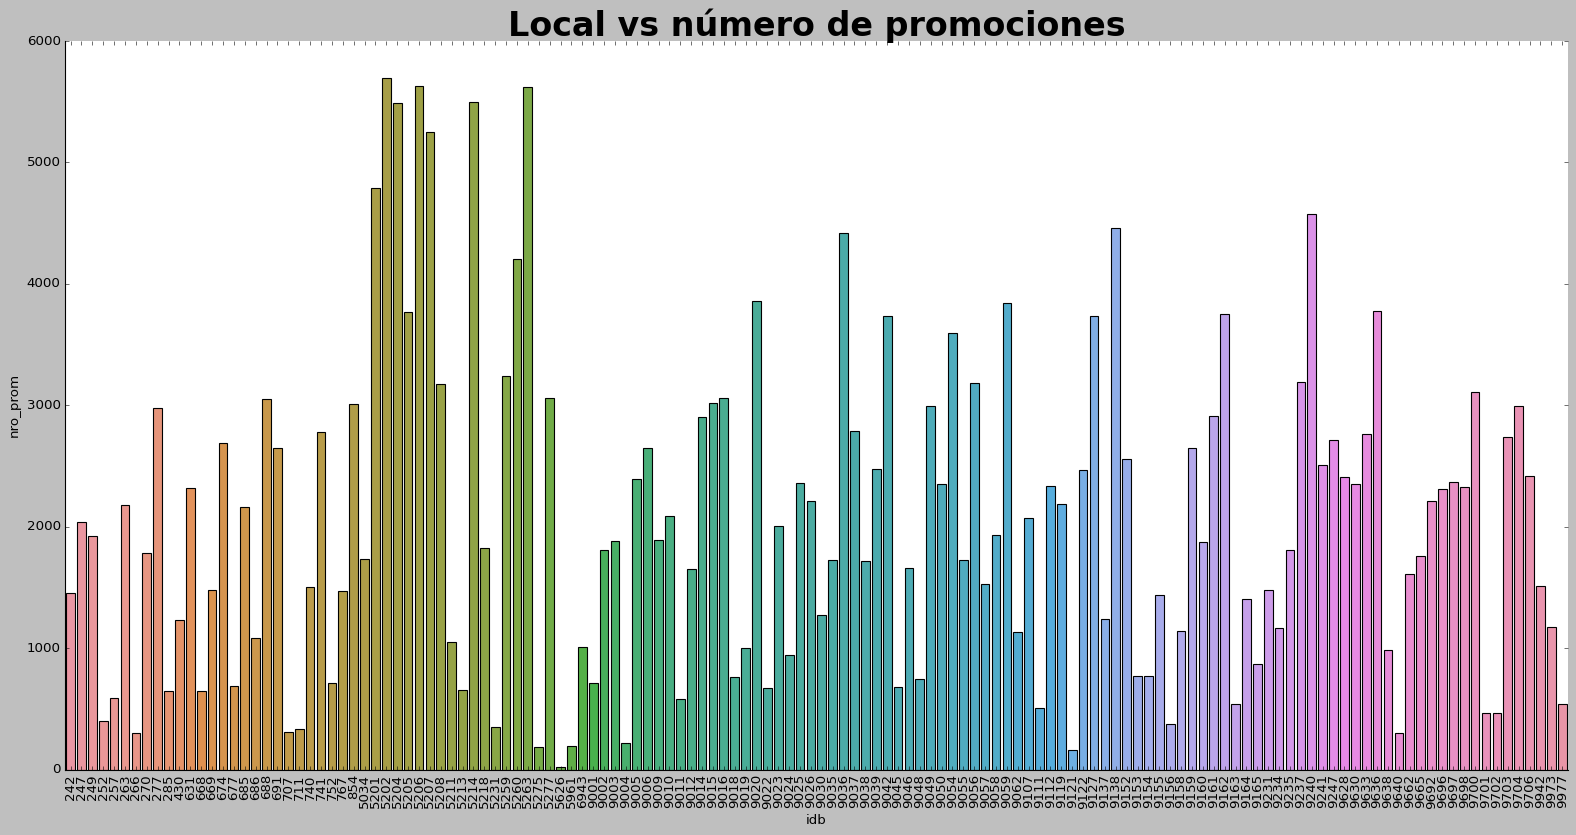

In [167]:
sns.catplot(x="idb", y="nro_prom", data=local_promociones, kind= "bar" , height=10, aspect=2)
plt.title("Local vs número de promociones", fontsize=30, fontweight='bold')
plt.xticks(rotation= 90)
plt.show()

#### Si el idb es el local, qué local vendió más (realción idb y ventas_estimadas_und).

In [141]:
local_mas_ventas=df_promociones.groupby(['idb'],as_index=False)['ventas_estimadas_und'].sum()
local_mas_ventas = local_mas_ventas.sort_values(by='ventas_estimadas_und', ascending=False)
local_mas_ventas



,idb,ventas_estimadas_und
29,5202,314130.80
120,9636,262652.82
28,5201,235674.67
71,9036,225830.63
33,5207,208177.92
...,...,...
43,5275,457.90
92,9121,332.80
46,5961,309.76
51,9004,247.80


El local 5202 destaca por presentar tanto el mayor número de promociones como la mayor cantidad de ventas. No obstante, esta tendencia no se repite en el resto de los locales.

### Conclusiones preliminares de Promociones

1. Se observa que entre porcentaje de descuento (porcentaje_dcto) y duración de la promoción (duracion_promo) hay una estrecha relación, esto puede deberse a que son los mismos datos por lo que creo que se debería descartar uno de los dos.

2. Se puede apreciar que durante el periodo de 2016 a 2018, la cantidad de promociones ha ido disminuyendo. No obstante, en 2019 se evidencia un aumento en el número de promociones, siendo incluso mayor que en 2018, a pesar de que solo se tienen registros hasta el mes de julio de dicho año.

3. Se puede observar que el porcentaje de descuento ha aumentado progresivamente a lo largo de los años.

4. Se puede observar que el porcentaje de descuento no afecta directamente a las ventas.

5. El local 5202 destaca por presentar tanto el mayor número de promociones como la mayor cantidad de ventas. No obstante, esta tendencia no se repite en el resto de los locales.
